<a href="https://colab.research.google.com/github/prajwal-mv/prajwal-mv-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title** :**Cardiovascular-Risk-Prediction**



![alt text](https://health.ucdavis.edu/media-resources/contenthub/health-news/2021/11/thumbnail/heart-disease-th.jpg)

##**Problem Description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.



![alt text](https://media.istockphoto.com/photos/heart-attack-concept-picture-id1128931450?k=20&m=1128931450&s=612x612&w=0&h=vU_ILgDtGKiGcY2YT7xDGxjc3D5SIISiBR4CWC99HiY=)

## <u>**Data Description**</u><br><br>
### **Variables:**<br>
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

###**Demographic:**<br>
* <font color = green>**Sex:**</font> male or female("M" or "F")
* <font color = green>**Age:**</font> Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

###**Behavioral:**<br>
* <font color = 'green'>**is_smoking**:</font> whether or not the patient is a current smoker ("YES" or "NO")
* <font color = 'green'>**Cigs Per Day:**</font> the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

###**Medical( history):**<br>
* <font color = 'green'> **BP Meds:**</font> whether or not the patient was on blood pressure medication (Nominal)
* <font color = 'green'> **Prevalent Stroke:**</font> whether or not the patient had previously had a stroke (Nominal)
* <font color = 'green'> **Prevalent Hyp:**</font> whether or not the patient was hypertensive (Nominal)
* <font color = 'green'> **Diabetes:**</font> whether or not the patient had diabetes (Nominal)

###**Medical(current):**<br>
* <font color = 'green'> **Tot Chol:**</font> total cholesterol level (Continuous)
* <font color = 'green'> **Sys BP:**</font> systolic blood pressure (Continuous)
* <font color = 'green'> **Dia BP:**</font> diastolic blood pressure (Continuous)
* <font color = 'green'>**BMI:**</font> Body Mass Index (Continuous)
* <font color = 'green'>**Heart Rate:**</font> heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* <font color = 'green'>**Glucose:**</font> glucose level (Continuous)

###**Predict variable (desired target):**<br>
 10-year risk of <font color = 'green'>**coronary heart disease CHD**</font>(binary: “1”, means “Yes”, “0” means “No”) -
DV

## **Importing Libraries**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## **Data Inspection**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

In [4]:
#first five rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#last five rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#shape
df.shape

(3390, 17)

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Checking Duplicate Data**

In [8]:
#checking duplicate value in the given dataset
df.duplicated().sum()

0

**Missing Values and Percentage**

In [9]:
#calculating no.of missing values
df1 = df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'no.of_missing'})

#calculating missing percentage
percent_missing = df.isnull().sum() * 100 / len(df)
df2 = percent_missing.reset_index().rename(columns={'index':'column_name', 0:'missing_percentage'}).round(2)

#merging dataframes on column_name
missing_value_df = df1.merge(df2,on='column_name')

In [10]:
#missing value and their percentage
missing_value_df

,column_name,no.of_missing,missing_percentage
0,id,0,0.00
1,age,0,0.00
2,education,87,2.57
3,sex,0,0.00
4,is_smoking,0,0.00
5,cigsPerDay,22,0.65
6,BPMeds,44,1.30
7,prevalentStroke,0,0.00
8,prevalentHyp,0,0.00
9,diabetes,0,0.00


**Droping columns**

In [11]:
#droping unnecessary columns
df.drop(['id','education'],axis=1,inplace=True)

In [12]:
#first five rows after droping unnecessary columns
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Relplacing Nan Values with Median**

In [13]:
#replacing glucose nan value with median
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [14]:
df.isnull().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

**Creating copy**

In [15]:
#creating the copy of dataframe
cardiovascular_risk = df.copy()

**Dropping Nan Value**

In [16]:
#dropping nan value
cardiovascular_risk.dropna(inplace=True)

In [17]:
#first five rows after dropping nan value
cardiovascular_risk.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


**Unique Values**

In [18]:
#columns list
col_lst = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [19]:
#unique element function
def unique_element(columns):
  for col_name in columns:
    print(f'{col_name} : {cardiovascular_risk[col_name].unique()}\n')    #getting unique element of each columns list

unique_element(col_lst)                                                  #function calling

sex : ['M' 'F']

is_smoking : ['NO' 'YES']

BPMeds : [0. 1.]

prevalentStroke : [0 1]

prevalentHyp : [1 0]

diabetes : [0 1]



**Data Description**

In [20]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3390.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,81.720059,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,23.161265,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,72.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,85.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## **Data Analysis**

**Target Variable**

In [21]:
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
#checking target variable is balanced or not
target_class = cardiovascular_risk.TenYearCHD.value_counts()
print(f'Class0: {target_class[0]}\nClass1: {target_class[1]}\nProportion: {round((target_class[0]/target_class[1]),2)}:1')

Class0: 2784
Class1: 488
Proportion: 5.7:1


In [32]:
# sns.countplot(cardiovascular_risk.TenYearCHD,palette='BuPu_r')
# plt.title('Risk of coronary heart disease',fontsize=15)

# Plotting the pieplot using plotly for dependent variable
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=cardiovascular_risk['TenYearCHD'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'hsl(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

**Observation:**<br>
* Clearly it's a **Unbalanced dataset**
* Class0: 2784<br>
  Class1: 488<br>
  Proportion: 5.7:1

**Outlier Detection**<br>

<font color = 'red'>***Continuous variables:***</font><br>

* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

In [40]:
#ploting the box plot using plotly for continuous variables
fig = px.box(cardiovascular_risk, x=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
fig.show()

**Obervations:**
* Here age has no outliers

In [41]:
#Continuous variables
continuous_variables = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [43]:
#handling outliers
for col_name in continuous_variables:
  upper_lim = cardiovascular_risk[col_name].quantile(.95)
  lower_lim = cardiovascular_risk[col_name].quantile(.05)
  cardiovascular_risk.loc[(cardiovascular_risk[col_name] > upper_lim),col_name] = upper_lim
  cardiovascular_risk.loc[(cardiovascular_risk[col_name] < lower_lim),col_name] = lower_lim

In [44]:
#ploting the box plot using plotly for continuous variables after handling outliers
fig = px.box(cardiovascular_risk, x=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
fig.show()

**Age**

Text(0.5, 1.0, 'Variation of Age for each target class')

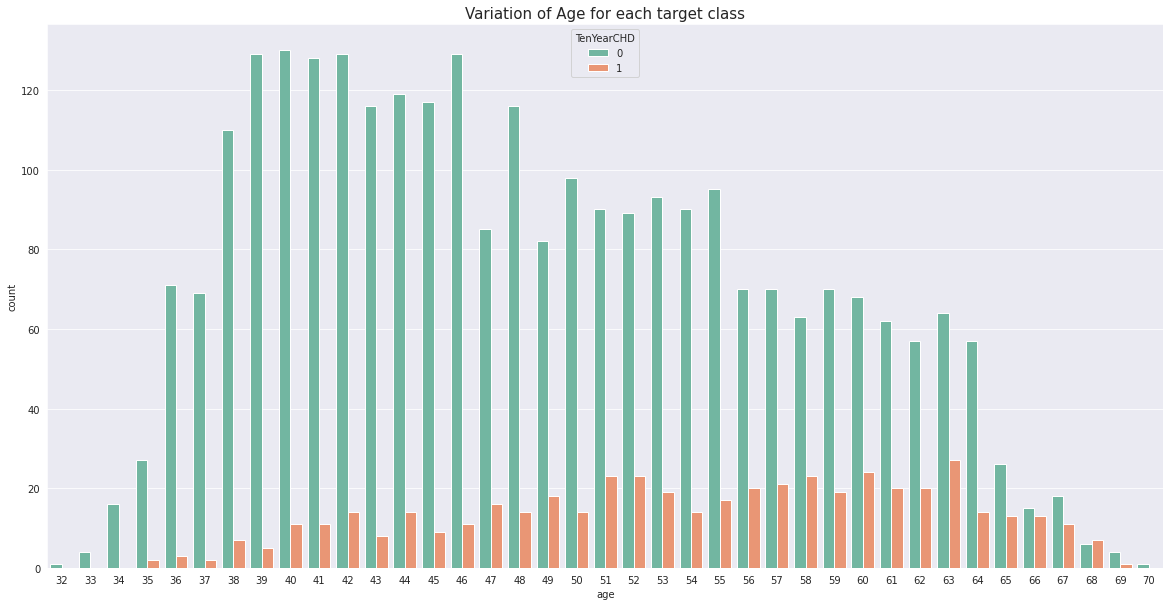

In [48]:
#ploting the countplot for age variable with target class
plt.figure(figsize=(20,10))
sns.countplot(data=cardiovascular_risk, x="age", hue="TenYearCHD",palette="Set2")
plt.title('Variation of Age for each target class',fontsize=15)

**Observation:**
* Here we see that CHD increases from 51 to 63 then decreases.
* Age group (*34 < age < 51*) are at lower risk of        cardiovascular disease.  

**Sex**

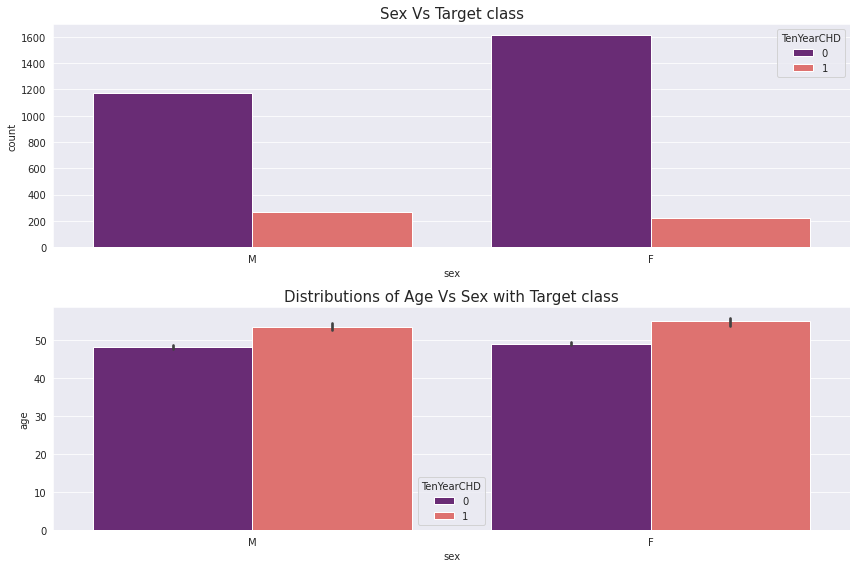

In [60]:
#plt.figure(figsize=(10,5))
fig,ax = plt.subplots(2,2,figsize=(12,8))

#ploting the countplot for sex variable with target class
ax1 = plt.subplot(2,1,1)
sns.countplot(data=cardiovascular_risk,x="sex",hue="TenYearCHD",palette = 'magma')
plt.title("Sex Vs Target class",fontsize=15)

#ploting the barplot between sex variable vs age varibale with target class
ax2 = plt.subplot(2,1,2)
sns.barplot(data=cardiovascular_risk,x="sex", y='age',hue="TenYearCHD",palette = 'magma')
plt.title("Distributions of Age Vs Sex with Target class",fontsize=15)
fig.tight_layout()

**Observation:**
* In the above bar chart we can say that no.of CHD female is less than male.
* In the above bar chart we conclude that male got early CHD as comapared to female.

In [61]:
#Checking male and female counts in the given dataset
cardiovascular_risk.sex.value_counts()

F    1837
M    1435
Name: sex, dtype: int64

**Smoking**<br>

Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

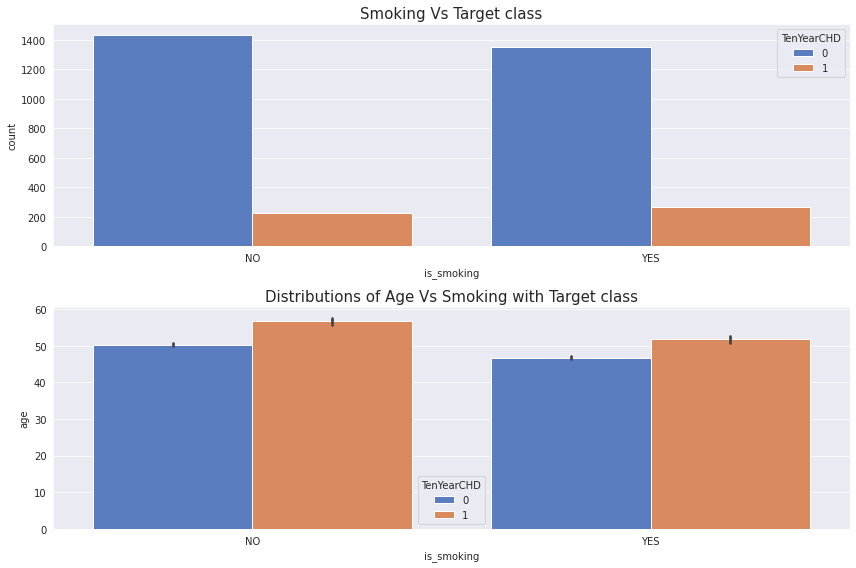

In [67]:
fig,ax = plt.subplots(2,2,figsize=(12,8))

#ploting the countplot for is_smoking variable with target class
ax1 = plt.subplot(2,1,1)
sns.countplot(data=cardiovascular_risk,x="is_smoking",hue="TenYearCHD",palette = 'muted')
plt.title("Smoking Vs Target class",fontsize=15)

#ploting the barplot between is_smoking variable and age variable with target class
ax2 = plt.subplot(2,1,2)
sns.barplot(data=cardiovascular_risk,x="is_smoking", y='age',hue="TenYearCHD",palette = 'muted')
plt.title("Distributions of Age Vs Smoking with Target class",fontsize=15)

fig.tight_layout()

  **Observation:**
* As we can see the countplot we can say that no. of patient those who smoke more than as compared to those who won’t.
* As we can see the barplot we can say that those who smoke get early heart disease as compared to those who won’t.


**CigsPerDay**

Smoking only about one cigarette per day carries a risk of developing coronary heart disease and stroke much greater than expected around half that for people who smoke 20 per day. No safe level of smoking exists for cardiovascular disease.

Text(0.5, 1.0, 'Distributions of Sex Vs CigsPerDay with Target class')

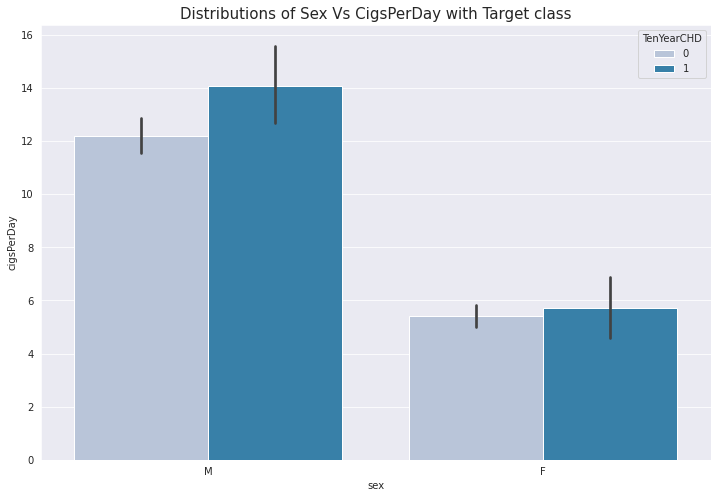

In [78]:
plt.figure(figsize=(12,8))
#smoking_person = cardiovascular_risk.groupby('sex')['cigsPerDay'].sum()

#ploting the barplot between sex variable and cigsPerDay variable with target class
sns.barplot(data=cardiovascular_risk,x="sex", y='cigsPerDay',hue="TenYearCHD",palette = 'PuBu')
plt.title("Distributions of Sex Vs CigsPerDay with Target class",fontsize=15)

**Observation:**
* Above plot shows that number of cigsperday taken by male is more than female.
*  So, in case of male CHD = 1 when he take cigsperday > 12.1 and in case of female CHD = 1 when she take cigsperday > 4.8.

#**BMI**<br>
<font color = 'blue'>The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m².</font>

Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.<br>

![alt text](https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167)


<br>If your BMI is:

* below 18.5 – you're in the underweight range
* between 18.5 and 24.9 – you're in the healthy weight range
* between 25 and 29.9 – you're in the overweight range
* between 30 and 39.9 – you're in the obese range


Text(0.5, 1.0, 'Distributions of BMI Vs Sex with Target class')

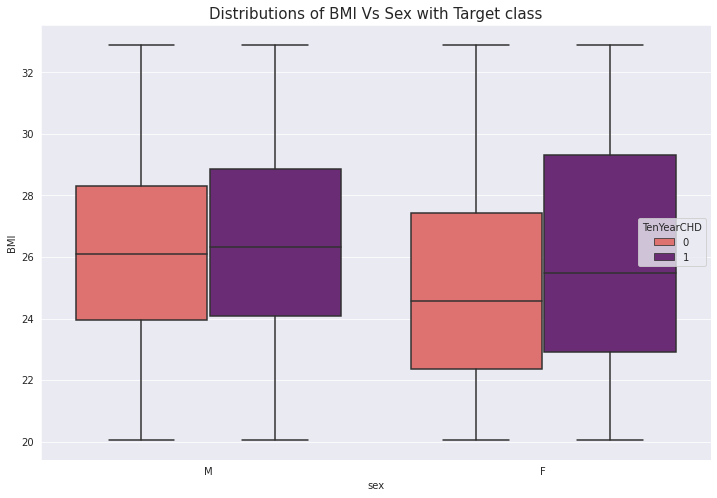

In [79]:
#ploting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.boxplot(data=cardiovascular_risk,x="sex", y='BMI',hue="TenYearCHD",palette = 'magma_r')
plt.title("Distributions of BMI Vs Sex with Target class",fontsize=15)

**Observation:**
* In above plot we can say that Female BMI is more than male BMI that's leads to overweight.
* so,Female CHD is more than male CHD.

In [80]:
#maximum BMI
cardiovascular_risk.BMI.unique().max()

32.898999999999994

**Cholesterol**<br>

Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot

* High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
* It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
* You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
*Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.
* High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

In [87]:
# plt.figure(figsize=(12,8))
# sns.violinplot(data=cardiovascular_risk,x="sex", y='totChol',hue="TenYearCHD",palette = 'seismic')
# plt.title("Distributions of Cholesterol Vs Sex with Target class",fontsize=15)

#ploting the boxplot between sex variable and totChol variable with target class
fig = px.box(cardiovascular_risk, x="sex", y="totChol", color="TenYearCHD")
fig.show()

**Observation:**
* Female has more cholesterol as compared to male. so, it it can cause your blood vessels to narrow and increase your risk of developing a blood clot.
* More cholesterol increases CHD problem.

**HeartRate**<br>
Heart rate is the speed of the heartbeat measured by the number of contractions of the heart per minute.

Text(0.5, 1.0, 'Distributions of sex Vs heartRate with Target class')

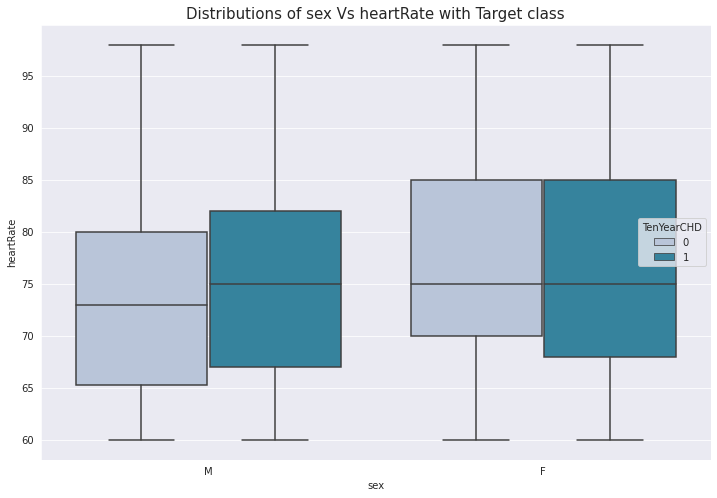

In [83]:
#ploting the boxplot between sex variable and totChol variable with target class
plt.figure(figsize=(12,8))
sns.boxplot(data=cardiovascular_risk,x="sex", y='heartRate',hue="TenYearCHD",palette = 'PuBuGn')
plt.title("Distributions of sex Vs heartRate with Target class",fontsize=15)

**Observation:**
* As we can see the box plot we can say that for Female heart disease patients has more HeartRate as compared to male heart disease patients.

**Glucose**

Text(0.5, 1.0, 'Distributions of sex Vs glucose with Target class')

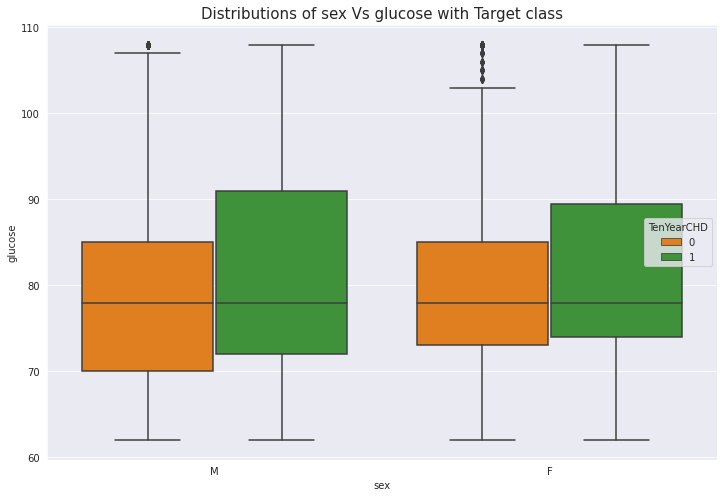

In [88]:
#ploting the boxplot between sex variable and glucose variable with target class
plt.figure(figsize=(12,8))
sns.boxplot(data=cardiovascular_risk,x="sex", y='glucose',hue="TenYearCHD",palette = 'Paired_r')
plt.title("Distributions of sex Vs glucose with Target class",fontsize=15)

**Observation:**
* As we can see the box plot we can say that for male heart disease patients has more glucose level as compared to female heart disease patients.

**Systolic BP | Diastolic BP**<br>
  Blood pressure is measured using two numbers: The first number, called **systolic blood pressure**, measures the pressure in your arteries when your heart beats. The second number, called **diastolic blood pressure**,measures the pressure in your arteries when your heart rests between beats.<br><br>

 ![alt text](https://s3.amazonaws.com/cms.ipressroom.com/67/files/201710/5a09a9382cfac206544f5421_Blood+Pressure+Chart+1200x630/Blood+Pressure+Chart+1200x630_a306d4c2-86d7-494b-a53f-f7ebe05db672-prv.jpg) 

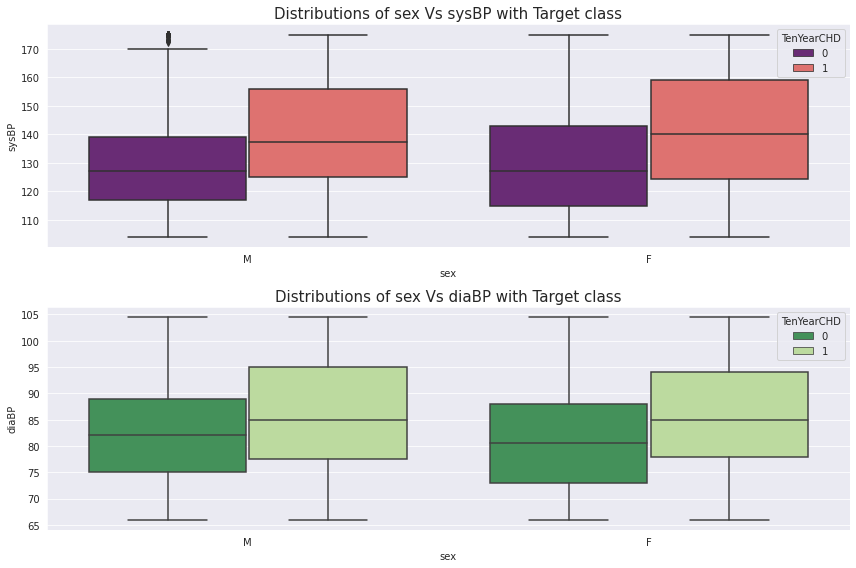

In [92]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
#ploting the boxplot between sex variable and glucose variable with target class
ax1 = plt.subplot(2,1,1)
sns.boxplot(data=cardiovascular_risk,x="sex", y='sysBP',hue="TenYearCHD",palette = 'magma')
plt.title("Distributions of sex Vs sysBP with Target class",fontsize=15)

#ploting the boxplot between sex variable and glucose variable with target class
ax1 = plt.subplot(2,1,2)
sns.boxplot(data=cardiovascular_risk,x="sex", y='diaBP',hue="TenYearCHD",palette = 'YlGn_r')
plt.title("Distributions of sex Vs diaBP with Target class",fontsize=15)
fig.tight_layout()

**Observation:**
* As we can see the box plot we can say that for female heart disease patients has more Systolic BP level as compared to male heart disease patients.
* As we can see the box plot we can say that for male heart disease patients has more Diastolic BP level as compared to female heart disease patients.

**BPMeds | prevalentStroke | prevalentHyp | diabetes**

In [93]:
#categoric(0,1) list
cat_lst = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
#palette list
color_lst = ['PuRd', 'Paired_r', 'CMRmap', 'gist_heat']

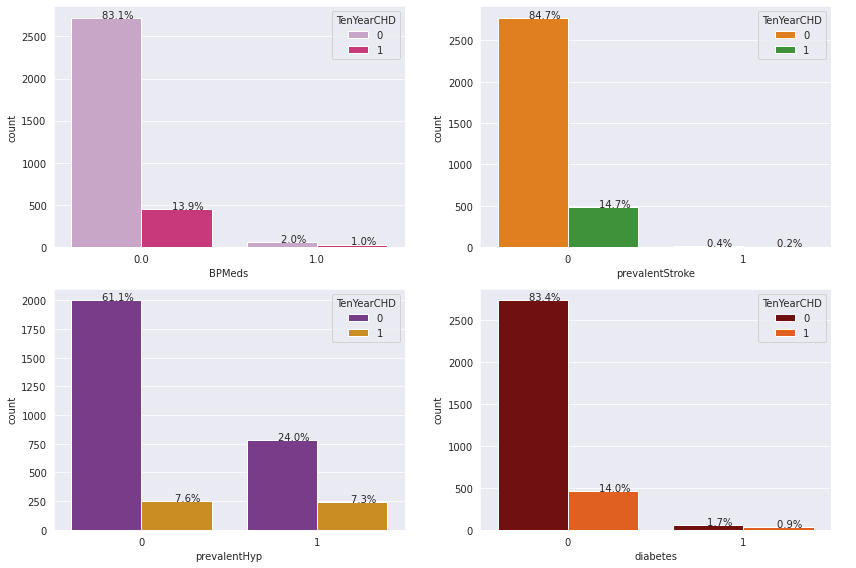

In [94]:
#count plot for BPMeds,prevalentStroke,prevalentHyp,diabetes variable
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i in range(4):
  ax1 = plt.subplot(2,2,i+1)
  ax = sns.countplot(data = cardiovascular_risk, x=cat_lst[i],hue="TenYearCHD",palette = color_lst[i])
  for p in ax.patches:                                        
    percentage = '{:.1f}%{}'.format(100 * p.get_height()/len(cardiovascular_risk),' '*15)     #percentage
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
  fig.tight_layout()  

**Observations:**<br>
In the given dataset, 
* BPMeds means whether or not the patient was on blood pressure medication i.e if the patients is take medication then it reduces the risk of heart disease, as compared to who won't take medication.


**Systolic_Bp | Glucose | BMI**

Blood pressure is measured using two numbers: The first number, called **systolic blood pressure**, measures the pressure in your arteries when your heart beats. The second number, called **diastolic blood pressure**, measures the pressure in your arteries when your heart rests between beats.

* **Normal	systolic:** less than 120 mm Hg
* **At Risk (prehypertension)	systolic:** 120–139 mm Hg
* **High Blood Pressure (hypertension)	systolic:** 140 mm Hg or higher

![alt text](https://cdn.shopify.com/s/files/1/0452/2459/1511/articles/793x529_photos_e14fff20-abdc-463c-ac0f-22ff680dc138_1024x1024.png?v=1622024992)

In [103]:
#ploting the 3d_scatterplot between sysBP,glucose and BMI variable with sex variable
fig = px.scatter_3d(cardiovascular_risk, x='sysBP', y='glucose', z='BMI',
              color='sex')
fig.show()

**Observation:**
* High **BMI** cause Overweight/obese that's increases the chance of CHD problem here highest BMI noted is 32.899(Female)